In [4]:
# Let's try ellipse encoding directly, no bullshit

In [96]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [15]:

from dataset_4channel import BeetleDataset
import cv2
import matplotlib.pyplot as plt
import numpy as np

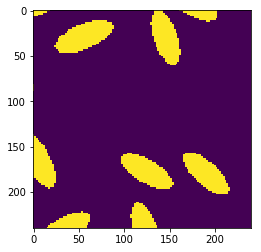

In [38]:
raw_files = ['raw_densebox_1', 'raw_densebox_2', 'raw_densebox_3', 'raw_densebox_4', 'raw_densebox_5']
label_files = ['class_lab_densebox_1', 'class_lab_densebox_2', 'class_lab_densebox_3', 'class_lab_densebox_4', 'class_lab_densebox_5']

db = BeetleDataset(raw_files, label_files)
#db = RotatedSquaresDataset()

x_b,y_b,x_thresh_b=db.generate_batch(n=1)
patch = x_thresh_b[0,0]
plt.imshow(patch)
plt.show()

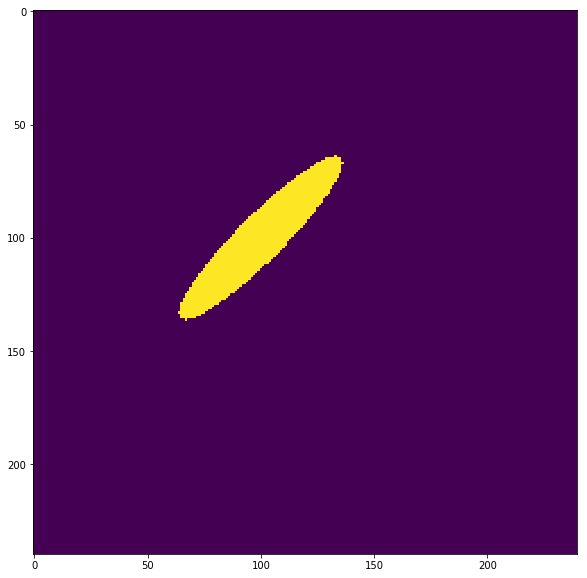

(0.7853981633974483, 0.7848666784154311)


In [198]:
""" Sloppy code for doing drawing """

from skimage.measure import label, regionprops
from skimage.draw import ellipse
import math

plt.figure(figsize=(10,10))
#for angle in range(0,180,5):
patch2 = np.zeros((240,240))

# Draw an ellipse
angle = math.pi/4
#cv2.ellipse(patch2, ((100,100),(100,20),angle), color=(255,0,0), thickness=20)
rr,cc=ellipse(100,100,10,50,patch2.shape, rotation=angle)
patch2[rr,cc]=1
# Let's do some labelling

# Fuck this, let's switch to skimage and regionprops
# THis documentation sucks
plt.imshow(patch2)
plt.show()

print(angle, regionprops(label(patch2))[0].orientation)

In [192]:
np.rad2deg()

' Sloppy code for finding angles'

(0.7853981633974483, 0.7848666784154311)


In [189]:
help(r)

Help on _RegionProperties in module skimage.measure._regionprops object:

class _RegionProperties(__builtin__.object)
 |  Please refer to `skimage.measure.regionprops` for more information
 |  on the available region properties.
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other)
 |  
 |  __getitem__(self, key)
 |  
 |  __init__(self, slice, label, label_image, intensity_image, cache_active)
 |  
 |  __iter__(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  area
 |      Number of pixels of region.
 |  
 |  bbox
 |      Bounding box ``(min_row, min_col, max_row, max_col)``.
 |      Pixels belonging to the bounding box are in the half-open interval
 |      ``[min_row; max_row)`` and ``[min_col; max_col)``.
 |  
 |  bbox_area
 |      Number of pixels 